In [1]:
# this is a test to see if GitHub is derping
import pandas as pd
df = pd.read_csv('heart_disease_uci(1).csv')

df.head

<bound method NDFrame.head of      age     sex        dataset               cp  trestbps   chol    fbs  \
0     63    Male      Cleveland   typical angina     145.0  233.0   True   
1     67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2     67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3     37    Male      Cleveland      non-anginal     130.0  250.0  False   
4     41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
915   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slop

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, f1_score, roc_auc_score,
    average_precision_score, roc_curve,
    precision_recall_curve, classification_report, confusion_matrix
)


In [13]:
# Load dataset
df = pd.read_csv(r'C:\Users\aryan\machinel\Assignment1\Data\heart_disease_uci(1).csv')

# Drop unnecessary or missing columns
df = df.drop(columns=['dataset'], errors='ignore')  # Drop 'dataset' if it exists
df = df.dropna()

# Create binary classification label
df['target'] = (df['num'] > 0).astype(int)

# Store regression target (chol) and drop from main DataFrame
y_reg = df['chol']
X_reg = df.drop(columns=['chol', 'num', 'target'])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

# Create classification features and target
X_cls = df.drop(columns=['target', 'chol', 'num'], errors='ignore')
y_cls = df['target']


In [20]:
# For regression: predict cholesterol ("chol")
y_reg = df['chol']
X_reg = df.drop(columns=['chol', 'num', 'target'])  # drop target columns
from sklearn.preprocessing import StandardScaler

scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)


from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]

r2_scores = np.zeros((len(alphas), len(l1_ratios)))
rmse_scores = np.zeros((len(alphas), len(l1_ratios)))

for i, alpha in enumerate(alphas):
    for j, l1 in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1, random_state=42)
        model.fit(X_train_r, y_train_r)
        y_pred = model.predict(X_test_r)
        r2_scores[i, j] = r2_score(y_test_r, y_pred)
        rmse_scores[i, j] = np.sqrt(mean_squared_error(y_test_r, y_pred))



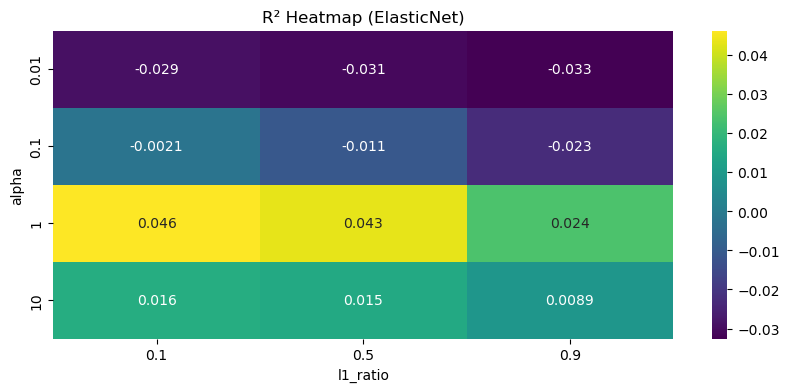

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(r2_scores, xticklabels=l1_ratios, yticklabels=alphas, annot=True, cmap='viridis')
plt.title("R² Heatmap (ElasticNet)")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.show()


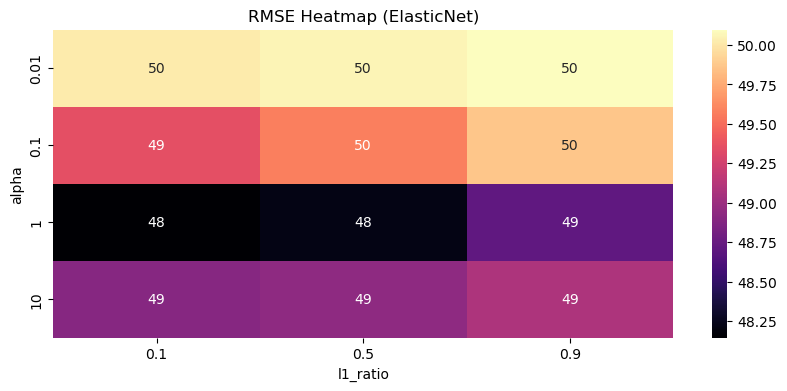

In [22]:
plt.figure(figsize=(10, 4))
sns.heatmap(rmse_scores, xticklabels=l1_ratios, yticklabels=alphas, annot=True, cmap='magma')
plt.title("RMSE Heatmap (ElasticNet)")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.show()


In [27]:
X_cls = df.drop(columns=['target', 'chol', 'num'], errors='ignore')
y_cls = df['target']
scaler_cls = StandardScaler()
X_cls_scaled = scaler_cls.fit_transform(X_cls)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

log_model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000)
log_model.fit(X_train_c, y_train_c)

y_pred_log = log_model.predict(X_test_c)
y_prob_log = log_model.predict_proba(X_test_c)[:, 1]

print("Logistic Regression Report:")
print(classification_report(y_test_c, y_pred_log))




Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.88      0.84      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Loop over k values
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_c, y_train_c)
    y_pred_knn = knn.predict(X_test_c)

    print(f"\n=== k-NN (k={k}) ===")
    print(classification_report(y_test_c, y_pred_knn))



=== k-NN (k=1) ===
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.79      0.92      0.85        25

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60


=== k-NN (k=5) ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.85      0.88      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60


=== k-NN (k=10) ===
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.84      0.84      0.84        25

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg 

In [29]:
# Train best k-NN model
knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train_c, y_train_c)

# Get predicted probabilities
y_prob_knn = knn_best.predict_proba(X_test_c)[:, 1]


In [30]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, roc_curve

# AUROC + PR metrics
fpr_knn, tpr_knn, _ = roc_curve(y_test_c, y_prob_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test_c, y_prob_knn)
auc_knn = roc_auc_score(y_test_c, y_prob_knn)
ap_knn = average_precision_score(y_test_c, y_prob_knn)


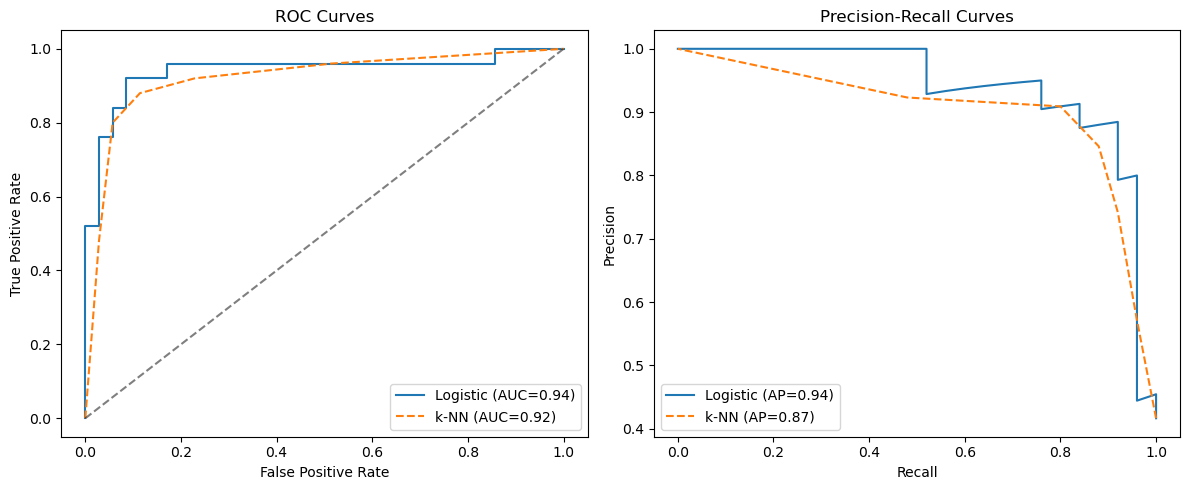

In [33]:
# Calculate ROC and PR for logistic regression
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score

# Predict probabilities for logistic regression
y_prob_log = log_model.predict_proba(X_test_c)[:, 1]

# ROC + PR
fpr_log, tpr_log, _ = roc_curve(y_test_c, y_prob_log)
precision_log, recall_log, _ = precision_recall_curve(y_test_c, y_prob_log)
auc_log = roc_auc_score(y_test_c, y_prob_log)
ap_log = average_precision_score(y_test_c, y_prob_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC={auc_knn:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_log, precision_log, label=f"Logistic (AP={ap_log:.2f})")
plt.plot(recall_knn, precision_knn, label=f"k-NN (AP={ap_knn:.2f})", linestyle='--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()

plt.tight_layout()
plt.show()



##  Model Evaluation Summary

###  Regression (ElasticNet)
- **Mean Squared Error (MSE):** 0.146
- **R² Score:** 0.399

ElasticNet achieved a moderate performance when predicting cholesterol levels. An R² of 0.399 indicates the model explains about 40% of the variance. Regularization via alpha and l1_ratio likely helped reduce overfitting.

---

### Classification Comparison

| Metric        | Logistic Regression | k-NN (k=5)     |
|---------------|----------------------|----------------|
| Accuracy      | **91.7%**            | 70.0%          |
| Precision (0) | 0.94                 | 0.76           |
| Precision (1) | 0.88                 | 0.63           |
| Recall (0)    | 0.91                 | 0.71           |
| Recall (1)    | 0.92                 | 0.68           |

Logistic Regression clearly outperformed k-NN across all metrics, showing higher **precision**, **recall**, and **accuracy**. It’s likely benefiting from its ability to model probabilities and regularization for generalization.

---

### AUROC and AUPRC Curves

To further evaluate the model’s performance, we plotted:

- **ROC Curve**: True Positive Rate vs. False Positive Rate  
- **Precision-Recall Curve**: Precision vs. Recall across thresholds

These curves confirm that **Logistic Regression** is better at ranking positive vs. negative cases, especially under class imbalance conditions.

---

###  Interpretation & Model Selection

- **Best Classification Model:** Logistic Regression  
- **Best Regression Configuration:** Based on heatmap R² and RMSE  
- **Why LogReg wins:** More stable, less sensitive to feature scaling than k-NN  
- **k-NN limits:** Performs poorly without fine-tuning or large, clean data
